# Subject: Prediction of car price for a Chinese automobile company in US market

## 1. Imports

In [16]:
# Imports

import pandas as pd
import numpy as np

# Visualisation libraries
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# K fold and cross validator
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, cross_val_score

# Performance evaluators
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, make_scorer

from sklearn.inspection import permutation_importance

# Saving the model
import pickle

## 2. EDA

### 2.1 Insight about the dataset

In [17]:
input_data=pd.read_csv('/content/drive/MyDrive/Entri - Data Science with Gen AI - Assignments/Intermediate assessment/CarPrice_Assignment.csv')
display(input_data.head())
display(input_data.info())
display(input_data.describe())

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

None

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
for col in input_data.columns:
  print(input_data[col].head())
  print(input_data[col].unique())

0    1
1    2
2    3
3    4
4    5
Name: car_ID, dtype: int64
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
0    3
1    3
2    1
3    2
4    2
Name: symboling, dtype: int64
[ 3  1  2  0 -1 -2]
0          alfa-rome

In [19]:
input_data.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


Data set dont have any null Values

Features explanation

1. car_ID
- Unique identification number for each car
- No meaning in prediction, just for indexing the number of cars. Not useful for data analysis
2. symboling
- Car risk/safety rating
- Range: –3 (safe) to +3 (risky)
- Insurance-based safety score
- High safety score means high safety and high price
3. CarName
- Brand + model name of the car
- Contains spelling mistakes
- Brand value also needs to be checked here. So, car name and varient needs to be divided into two different feature.
4. fueltype
- Type of fuel
- Values: gas, diesel
5. aspiration
- Type of air induction
- Values: std, turbo
- Turbo increases power
6. doornumber
- Total number of doors
- Values: two, four
7. carbody
- Body style of the vehicle
- sedan, hatchback, wagon, convertible, hardtop
8. drivewheel
- Which wheels drive the car
- fwd = front wheel drive
- rwd = rear wheel drive
- 4wd = four-wheel drive
9. enginelocation
- Where the engine is placed
- Values: front, rear
10. wheelbase
- Distance between front & rear wheels
11. carlength
- Total length of the car
- Longer cars often = more interior space and high cost
12. carwidth
- Total width of the car
13. carheight
- Total height of the car
14. curbweight
- Weight of car without passengers
- Heavier cars usually consume more fuel
15. enginetype
- Type/design of engine
- dohc, ohc, ohcf, l, rotor, etc.
16. cylindernumber
- Number of cylinders
- More cylinders = more power
17. enginesize
- Engine displacement (cc)
- One of the strongest predictors of price
18. fuelsystem
- Fuel delivery method
- mpfi, spdi, carburetor, idi, etc.
19. boreratio
- Cylinder bore diameter
- Higher bore = more power potential
20. stroke
- Piston travel distance
- Paired with bore → defines engine design
21. compressionratio
- Pressure level inside cylinder
- Higher ratio = more efficiency
22. horsepower
- Engine power output
- High horsepower means more power to the vehicle and it leads to higher price
23. peakrpm
- RPM at which maximum horsepower is produced (or simply maximum speed)
24. citympg
- Fuel efficiency in city conditions or high traffic area
25. highwaympg
- Fuel efficiency on highways
- Usually higher than citympg
26. price
- Target variable
- Selling price of the car (USD)


The car name and price needs to be used to find out the luxury brands.

The carname needs to split into car name, model and varient.
Later, the carname and price can be used to identify the luxury brands.
The same analysis can be given inside the same brand to identify the top end models if possible.


In [20]:
# Splitting the car name into mutiple section
input_data['split'] = input_data['CarName'].str.lower().str.split()
input_data['car_company'] = input_data['split'].str[0]
input_data['car_model'] = input_data['split'].str[1]
input_data['car_variant'] = input_data['split'].str[2:].apply(lambda x: " ".join(x) if len(x) > 0 else None)

print(input_data['car_company'].unique())
print(input_data['car_model'].unique())
print(input_data['car_variant'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
['giulia' 'stelvio' 'quadrifoglio' '100' '100ls' 'fox' '5000' '4000'
 '5000s' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte' 'vega' 'rampage'
 'challenger' 'd200' 'monaco' 'colt' 'coronet' 'dart' 'civic' 'accord'
 'prelude' 'mu-x' 'd-max' 'xj' 'xf' 'xk' 'rx3' 'glc' 'rx2' 'rx-4' '626'
 'rx-7' 'electra' 'century' 'skyhawk' 'opel' 'skylark' 'regal' 'cougar'
 'mirage' 'lancer' 'outlander' 'g4' 'montero' 'pajero' 'versa' 'gt-r'
 'rogue' 'latio' 'titan' 'leaf' 'juke' 'note' 'clipper' 'nv200' 'dayz'
 'fuga' 'otti' 'teana' 'kicks' '504' '304' '604sl' '505s' 'fury' 'cricket'
 'satellite' 'valiant' 'duster' 'macan' 'panamera' 'cayenne' 'boxter'
 '12tl' '5' '99e' '99le' '99gle' nan 'dl' 'brz' 'baja' 'r1' 'r2' 'trezia'
 'tribeca' 'corona' 'co

### Spelling mistakes in the car name needs to be rectified

In [21]:
input_data['car_company'] = input_data['car_company'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'alfa-romero': 'alfa-romeo'
})

print(input_data['car_company'].unique())

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


#### The car model and variant names contribute very little predictive value because their effects are already captured by other technical features such as BHP, RPM, and engine specifications. High-end variants naturally exhibit higher performance metrics, which are explicitly represented in these numerical features. Therefore, the model and variant name columns along with the original carName field—can be safely removed to avoid redundancy.

In [22]:
input_data=input_data.drop(['car_ID','CarName','car_model','car_variant','split'], axis=1)
input_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


Car companies can be categorized as luxury or non-luxury based on their average selling price. We can create a Boolean feature to represent this classification

In [23]:

avg_price = input_data.groupby('car_company')['price'].mean().reset_index()
avg_price.columns = ['car_company', 'avg_price']
print(avg_price.sort_values(by='avg_price', ascending=False))

# input_data = pd.merge(input_data, avg_price, on='car_company')

   car_company     avg_price
8       jaguar  34600.000000
3        buick  33647.000000
15     porsche  31400.500000
2          bmw  26118.750000
21       volvo  18063.181818
1         audi  17859.166714
10     mercury  16503.000000
0   alfa-romeo  15498.333333
13     peugeot  15489.090909
17        saab  15223.333333
9        mazda  10652.882353
12      nissan  10415.666667
20  volkswagen  10077.500000
19      toyota   9885.812500
16     renault   9595.000000
11  mitsubishi   9239.769231
7        isuzu   8916.500000
18      subaru   8541.250000
6        honda   8184.692308
14    plymouth   7963.428571
5        dodge   7875.444444
4    chevrolet   6007.000000


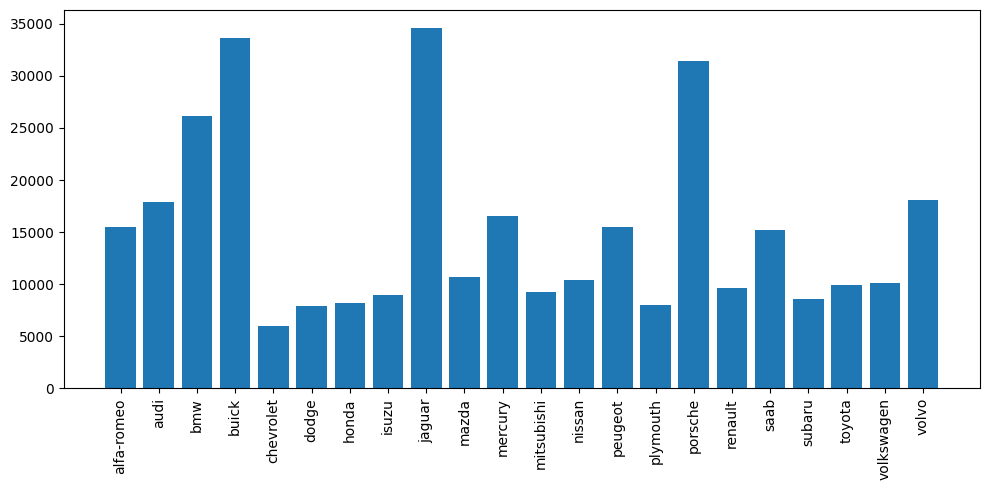

In [24]:
plt.figure(figsize=(10, 5))
plt.bar(avg_price['car_company'], avg_price['avg_price'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

It has been assumed that cars with average price more than $ 15000 is considered as luxury cars.

In [25]:
Luxurycars=['jaguar','buick','audi','bmw','porsche','volkswagen','volvo','mercury','alfa-romeo','peugeot','peugeot','saab']
input_data['Luxurycars'] = input_data['car_company'].apply(lambda x: 1 if x in Luxurycars else 0)

input_data=input_data.drop('car_company',axis=1)

Some of the features are actually numbers, but not written in numebers making those object. This needs to recitified using mapping to number.

In [26]:
# Outliers to be removed
print("Shape before removing outliers:", input_data.shape)
for col in input_data.select_dtypes(include=np.number).columns:
    Q1 = input_data[col].quantile(0.25)
    Q3 = input_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = input_data[(input_data[col] >= lower_bound) | (input_data[col] <= upper_bound)]
    input_data = input_data[(input_data[col] >= lower_bound) & (input_data[col] <= upper_bound)]

outlier_percentage = (len(outliers) / len(input_data)) * 100
print(f"Outliers in Total_Amount: {outlier_percentage:.2f}%")
input_data.reset_index(drop=True, inplace=True)
print("Shape after removing outliers:", input_data.shape)

Shape before removing outliers: (205, 25)
Outliers in Total_Amount: 100.00%
Shape after removing outliers: (125, 25)


In [27]:
# Convert door number into numerical values
input_data['doornumber'] = input_data['doornumber'].map({'two': 2, 'four': 4})
input_data['cylindernumber'] = input_data['cylindernumber'].map({'two': 2, 'four': 4,'three': 3,'five': 5,'six': 6,'eight': 8,'twelve': 12 })
print(input_data['doornumber'].unique())
print(input_data['cylindernumber'].unique())

# Defining the features

Numerical_cols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','compressionratio','horsepower','peakrpm','citympg','highwaympg','stroke','price']
Categorical_cols = ['fueltype','aspiration','carbody', 'drivewheel','enginelocation','fuelsystem','symboling','doornumber','cylindernumber','enginetype','fuelsystem','Luxurycars']

[2 4]
[4 6 5 2]


A simple count plot should be created for each feature to understand the unique values and their distribution.

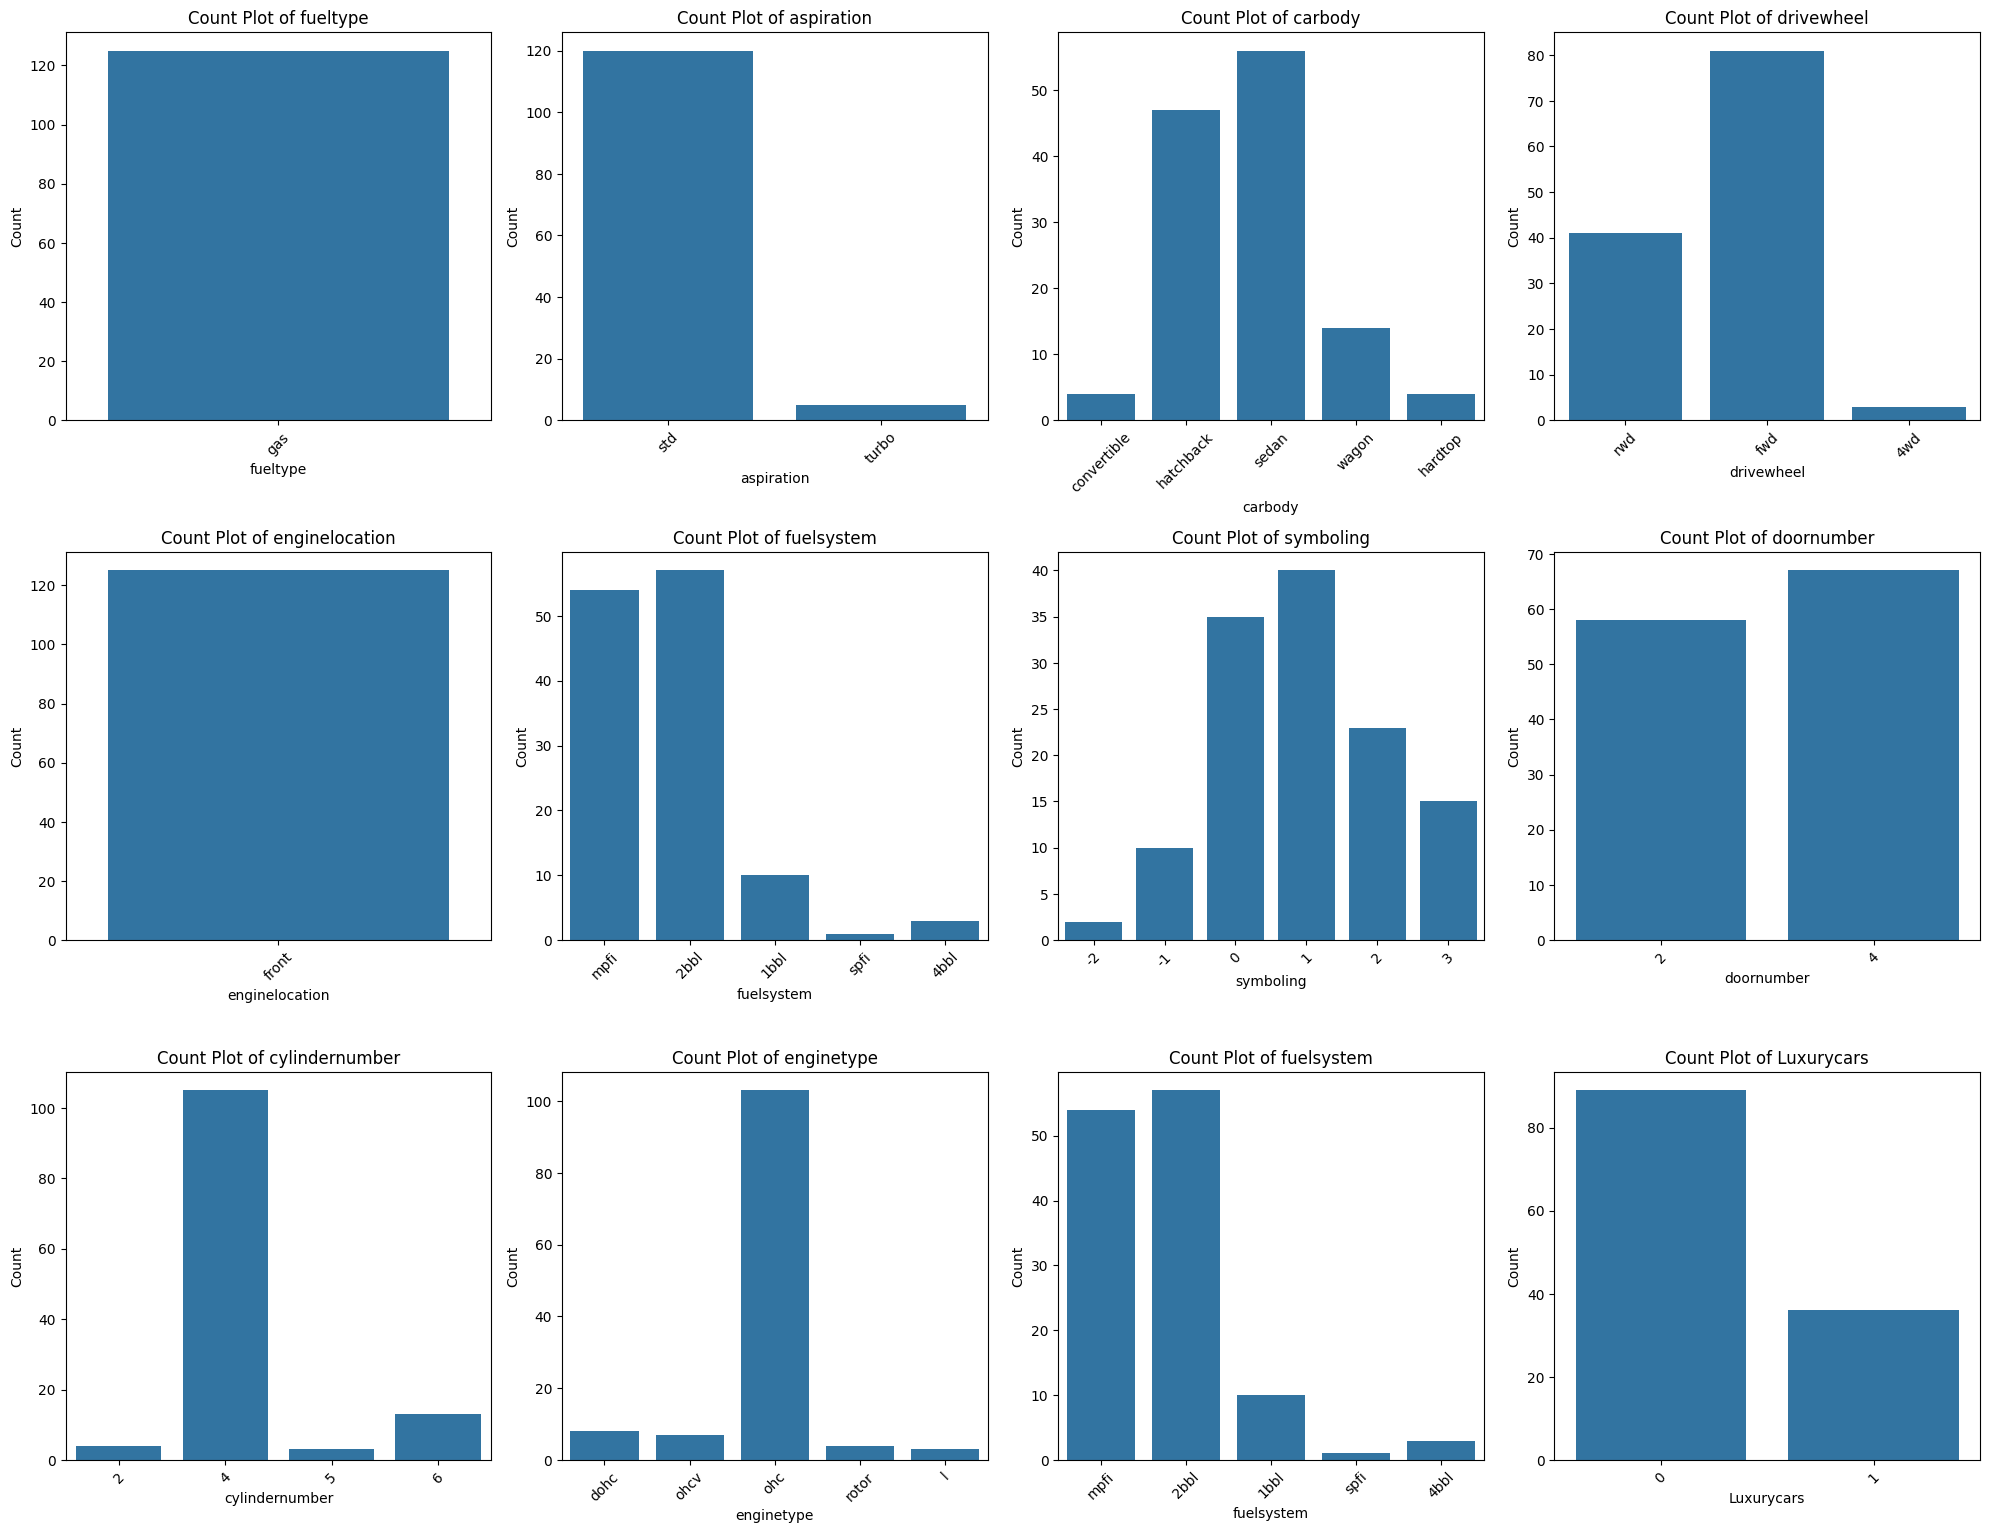

In [28]:
plt.figure(figsize=(20, 20))   # larger figure for 16 plots

for i, col in enumerate(Categorical_cols):
    plt.subplot(4, 4, i + 1)   # 4x4 layout for 16 graphs
    sns.countplot(data=input_data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

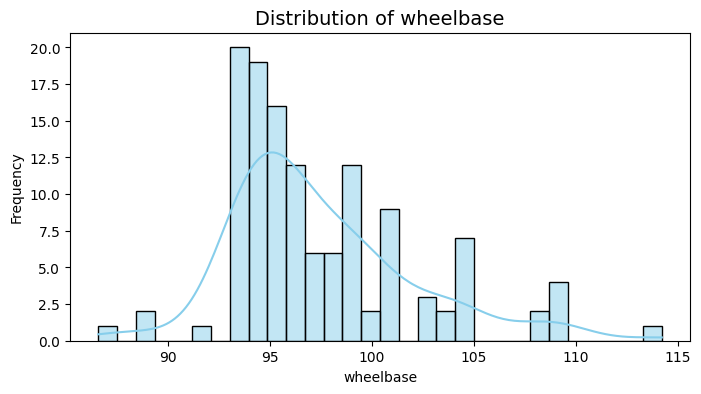

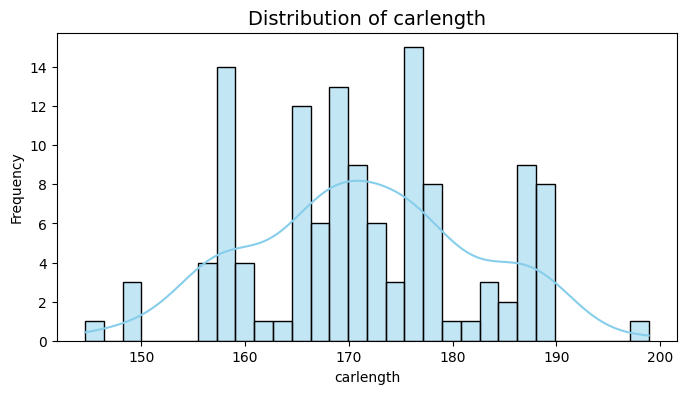

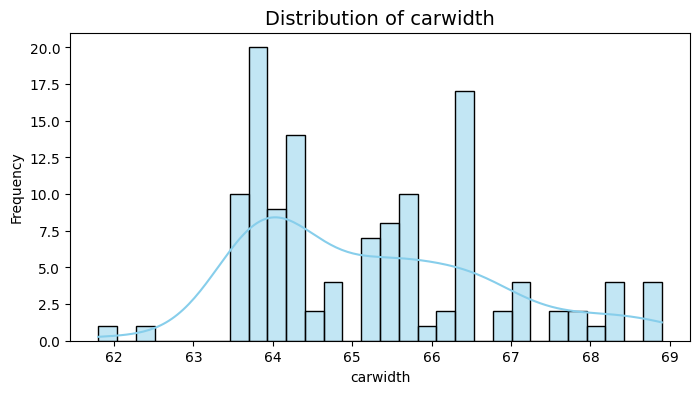

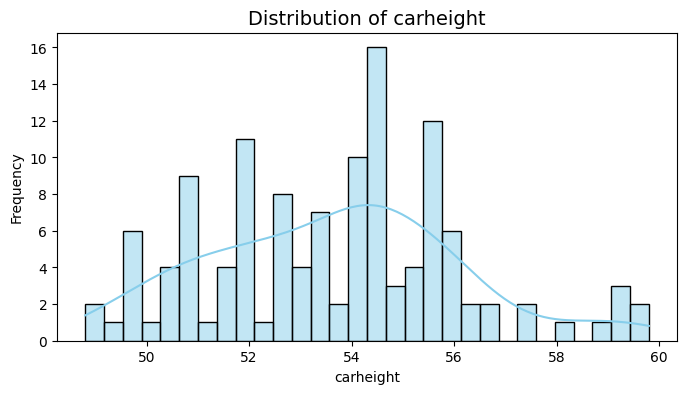

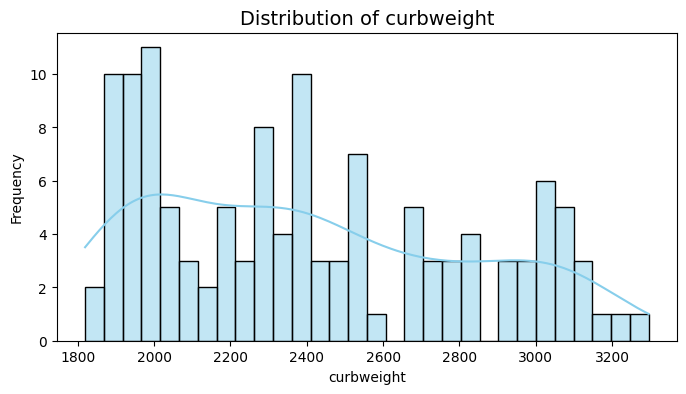

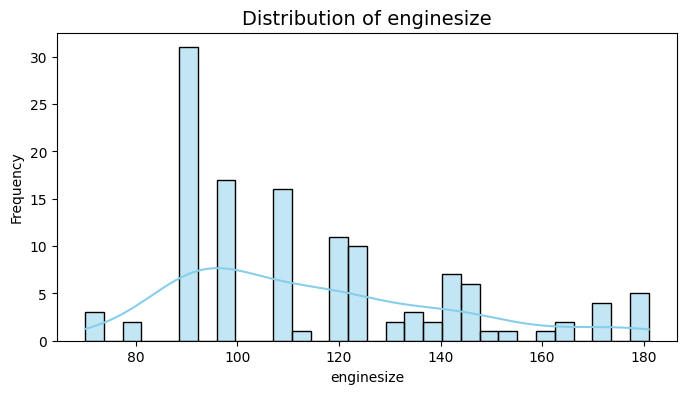

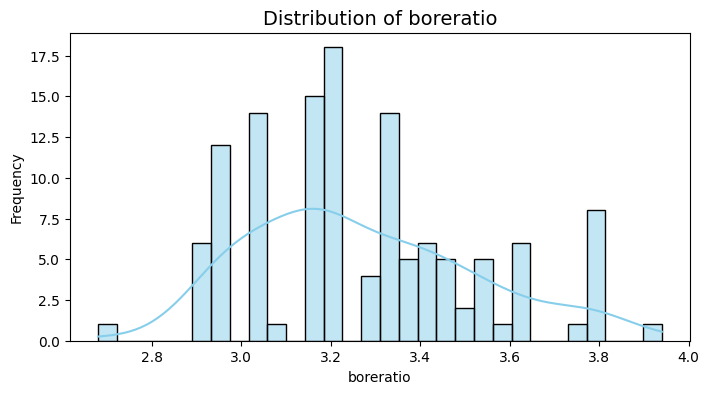

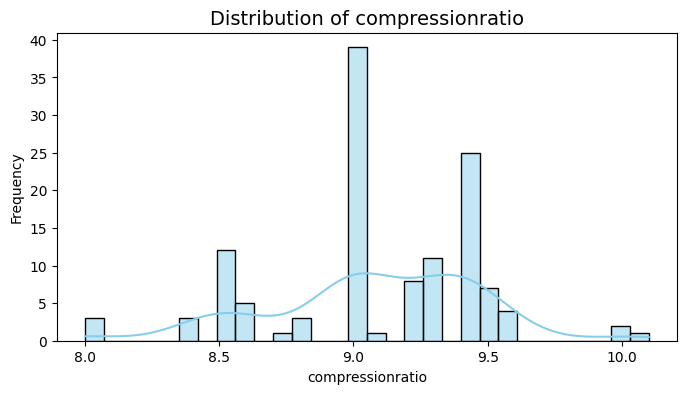

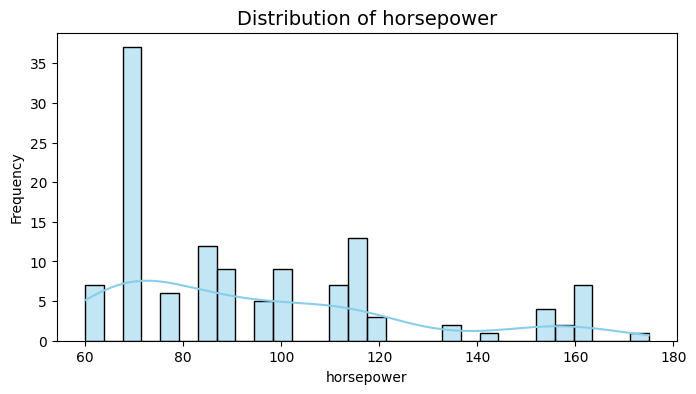

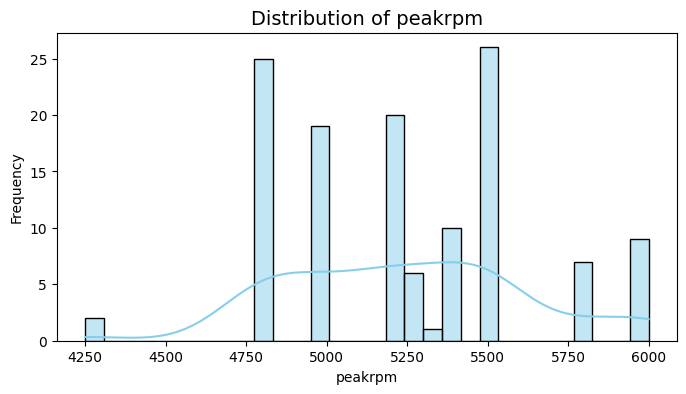

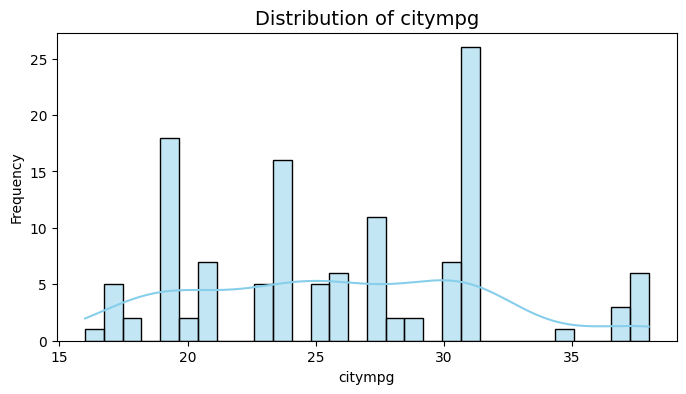

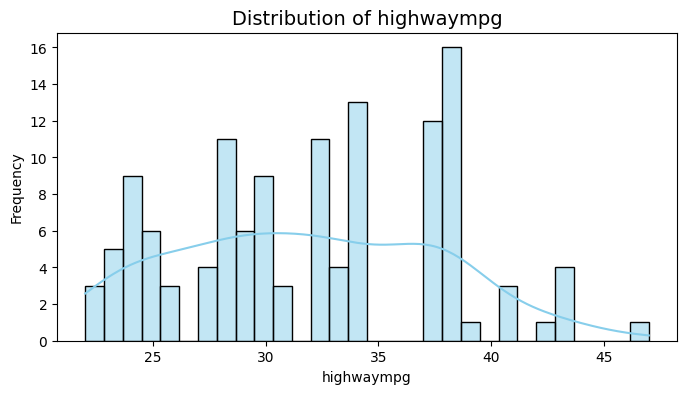

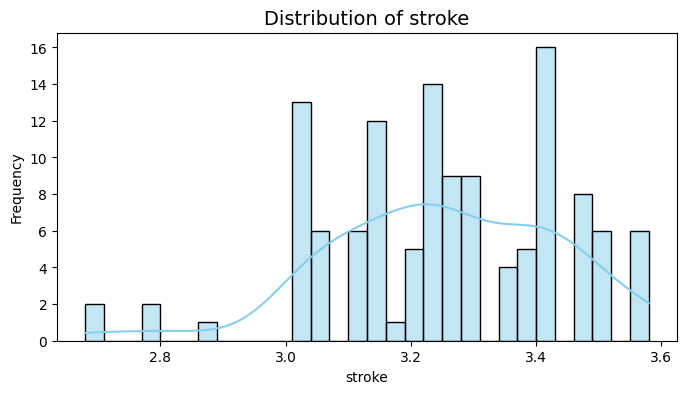

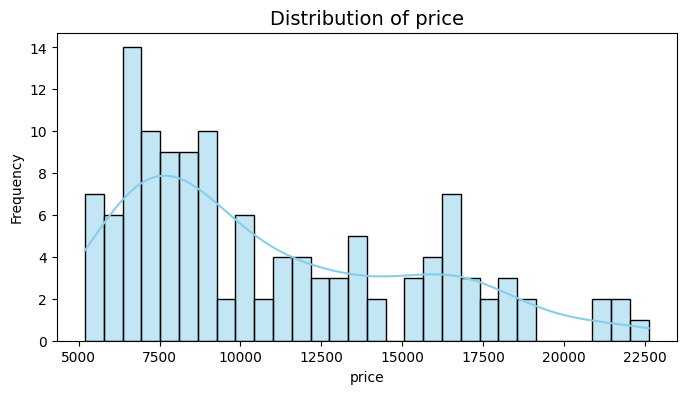

In [29]:
# Numerical values distribution
for col in Numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(input_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

The distribution plot for each numerical values to understand the distrbution.
- All features except Engine size, stroke length, horsepower and compression ratio follows normal distribution to a certain extent.
- The exceptional features are for the ultra premium cars. Hence, these are kept for the data analysis. Decided not to remove them as outliers.
- This analysis is explained below using box plot for each such features.

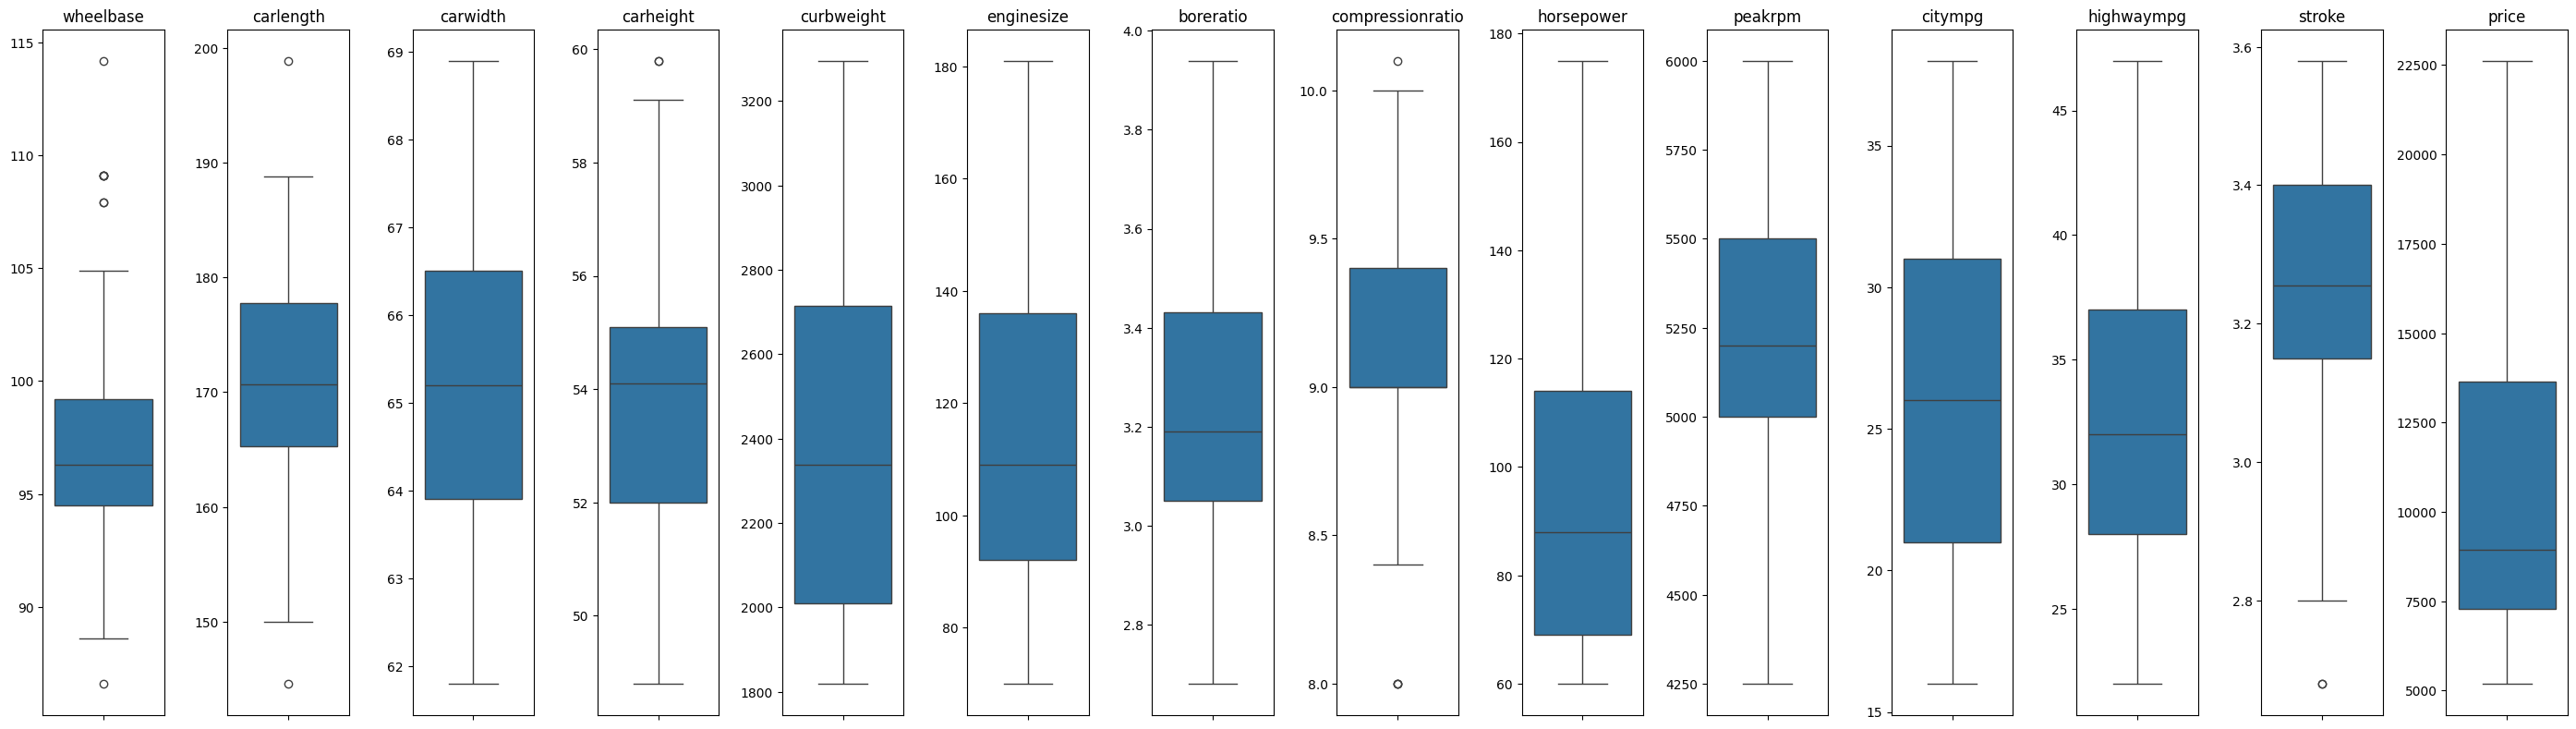

In [30]:
# Box plot
num_cols = Numerical_cols
n_cols = len(num_cols)

# Create a horizontal subplot layout
fig, axes = plt.subplots(1, n_cols, figsize=(2*n_cols, 8))  # 1 row, n_cols columns

for i, col in enumerate(num_cols):
    sns.boxplot(y=input_data[col], ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

As explianed in the graph, the compression ratio, horse power and price has some outliers which is concluded not as outliers, but exceptionally high priced vehicles.

A univariate analysis of these features below explain this distribution for confirmation.

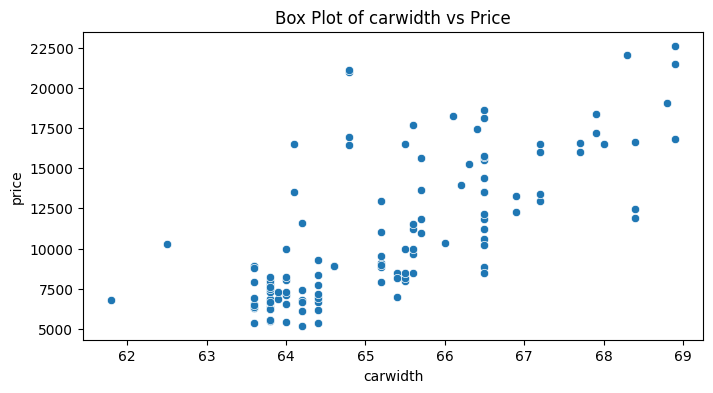

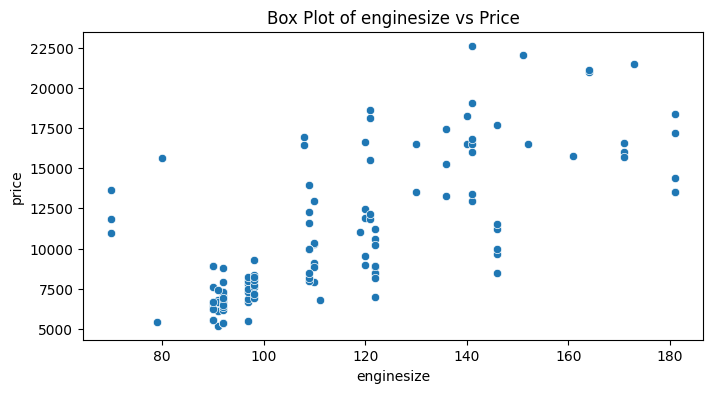

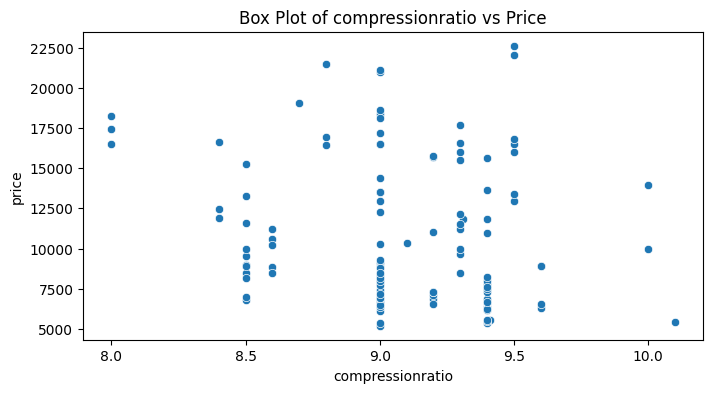

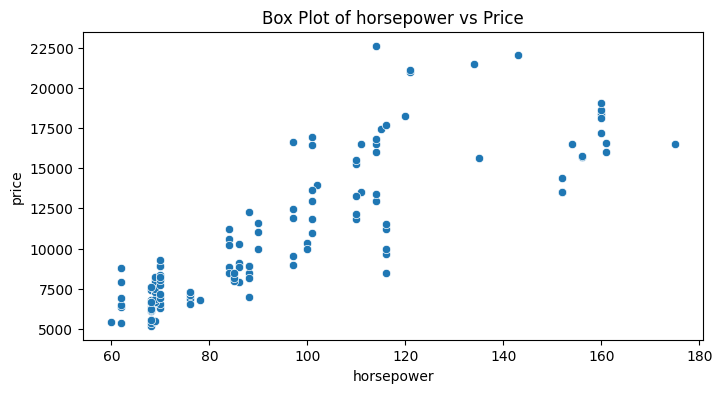

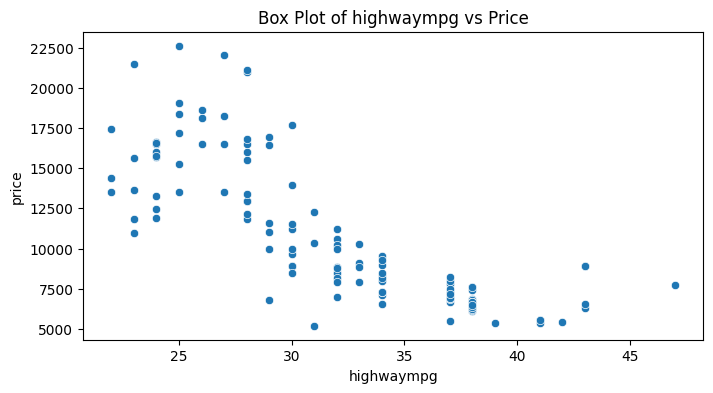

In [31]:
Outlier_features = ['carwidth','enginesize','compressionratio','horsepower','highwaympg']

for col in Outlier_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(y='price', x=col, data=input_data)
    plt.title(f'Box Plot of {col} vs Price')

In [32]:
input_data.head()
# One hot encoding



,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Luxurycars
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [33]:
# One hot encoding
encoding_row = ['fueltype','aspiration','carbody', 'drivewheel','enginelocation','fuelsystem','enginetype']
input_data = pd.get_dummies(input_data, columns=encoding_row, drop_first=True, dtype=int)
input_data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,drivewheel_fwd,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,1,0,0,1,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,1,0,0,1,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,1,0,0,0,1,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,1,0,0,0,1,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,1,0,0,1,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

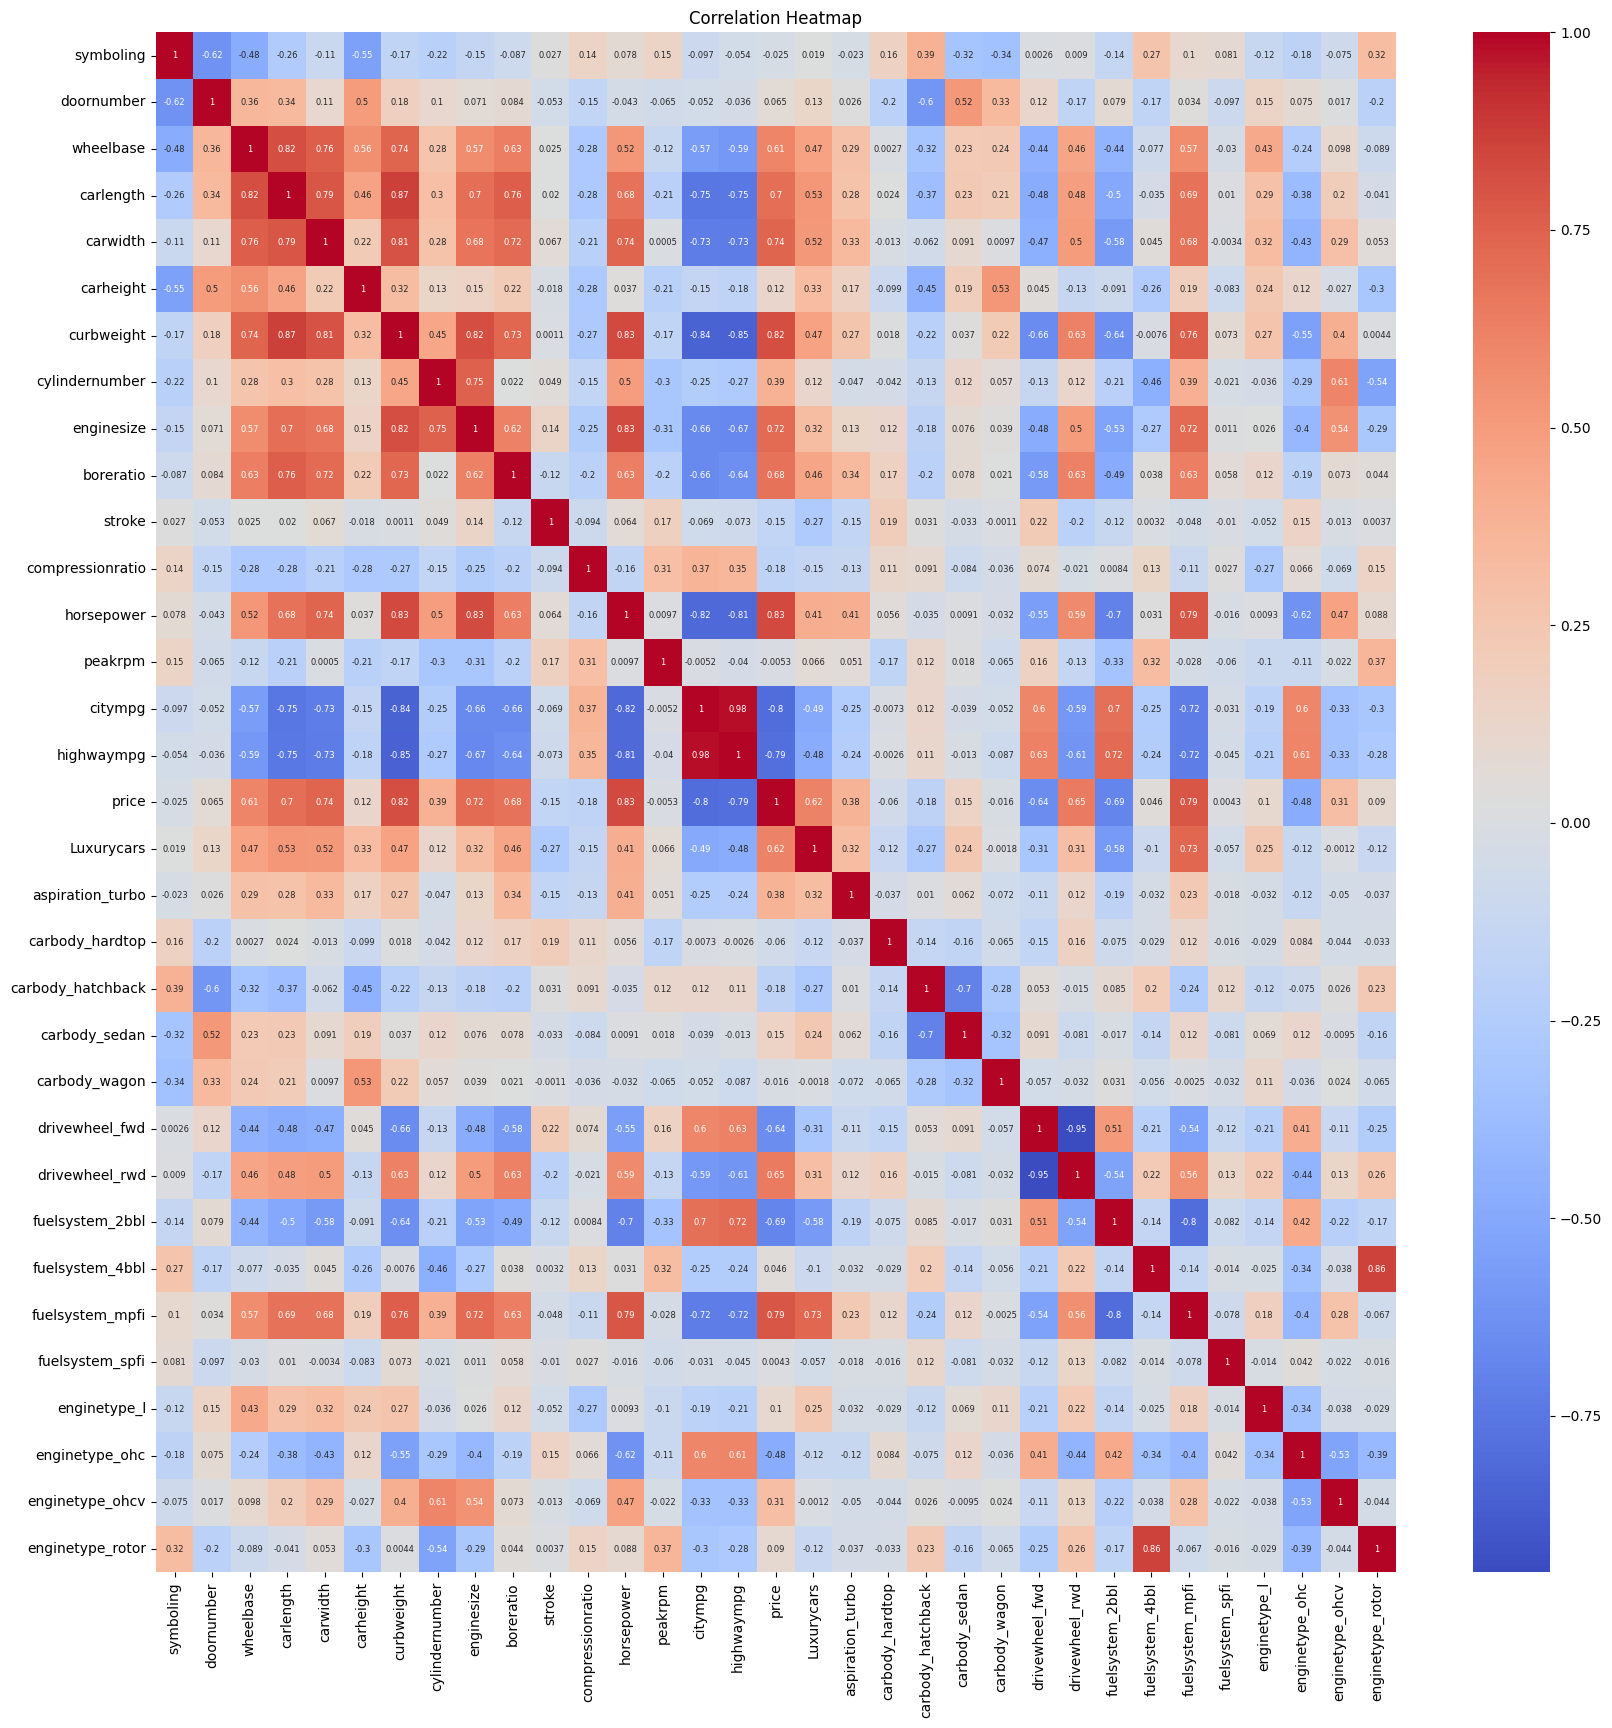

In [34]:
corr = input_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show

In [35]:
corr_table = input_data.corr()[['price']].sort_values(by='price', ascending=False)
print(corr_table)

                      price
price              1.000000
horsepower         0.833421
curbweight         0.818019
fuelsystem_mpfi    0.790114
carwidth           0.736771
enginesize         0.716638
carlength          0.701778
boreratio          0.684630
drivewheel_rwd     0.649845
Luxurycars         0.619283
wheelbase          0.608665
cylindernumber     0.385244
aspiration_turbo   0.376497
enginetype_ohcv    0.308008
carbody_sedan      0.148466
carheight          0.123671
enginetype_l       0.100063
enginetype_rotor   0.089830
doornumber         0.064546
fuelsystem_4bbl    0.046432
fuelsystem_spfi    0.004302
peakrpm           -0.005285
carbody_wagon     -0.016184
symboling         -0.025163
carbody_hardtop   -0.059741
stroke            -0.151922
compressionratio  -0.179054
carbody_hatchback -0.179645
enginetype_ohc    -0.477154
drivewheel_fwd    -0.644940
fuelsystem_2bbl   -0.685547
highwaympg        -0.789745
citympg           -0.803244


In [36]:
X = input_data.drop('price', axis=1)
y = input_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print(y_train)

[[ 0.90342862  0.94408916  0.28021347 ... -2.19089023 -0.2469324
  -0.153393  ]
 [-0.76887542  0.94408916 -0.82060635 ...  0.45643546 -0.2469324
  -0.153393  ]
 [-0.76887542  0.94408916 -0.4995339  ...  0.45643546 -0.2469324
  -0.153393  ]
 ...
 [-0.76887542  0.94408916 -0.4995339  ...  0.45643546 -0.2469324
  -0.153393  ]
 [ 0.90342862 -1.05922199 -0.95820882 ...  0.45643546 -0.2469324
  -0.153393  ]
 [ 0.90342862 -1.05922199  0.11967725 ...  0.45643546 -0.2469324
  -0.153393  ]]
85     18620.0
30      6785.0
94      7738.0
55      8189.0
9      21105.0
        ...   
106    15998.0
14      6229.0
92      6938.0
51      6189.0
102    11199.0
Name: price, Length: 87, dtype: float64


Mean Squared Error: 3686576.866495372
Mean Absolute Error: 1588.6947229785017
R² Score: 0.7099503623776406


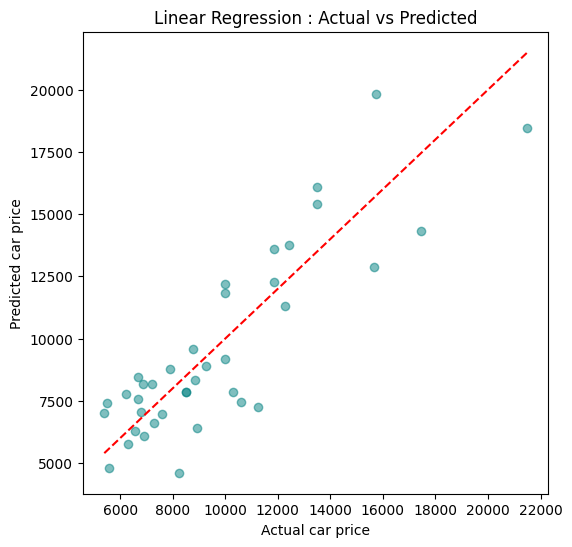

In [37]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import classification_report

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual car price')
plt.ylabel('Predicted car price')
plt.title('Linear Regression : Actual vs Predicted')
plt.show()

Mean Squared Error: 2354551.43461374
Mean Absolute Error: 1187.9382642211592
R² Score: 0.8147504269937677


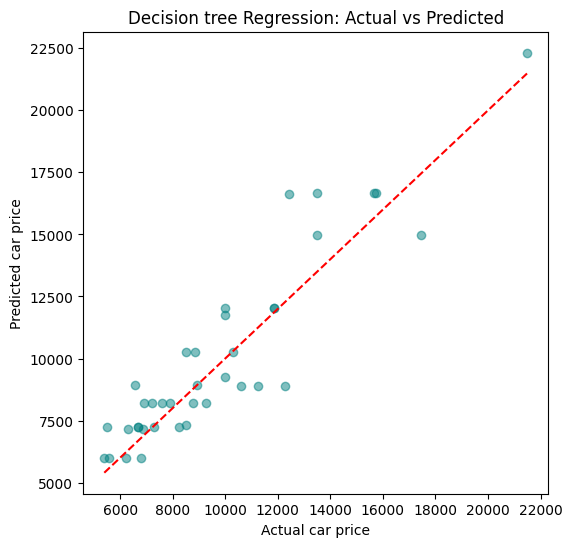

In [38]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.model_selection import train_test_split
from sklearn import tree

dt_model = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

# plt.figure(figsize=(20,10))
# tree.plot_tree(regressor, feature_names=X.columns, filled=True, fontsize=8)
# plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual car price')
plt.ylabel('Predicted car price')
plt.title('Decision tree Regression: Actual vs Predicted')
plt.show()

Mean Squared Error: 1567146.5184524665
Mean Absolute Error: 999.5679605263159
R² Score: 0.8767012607523911


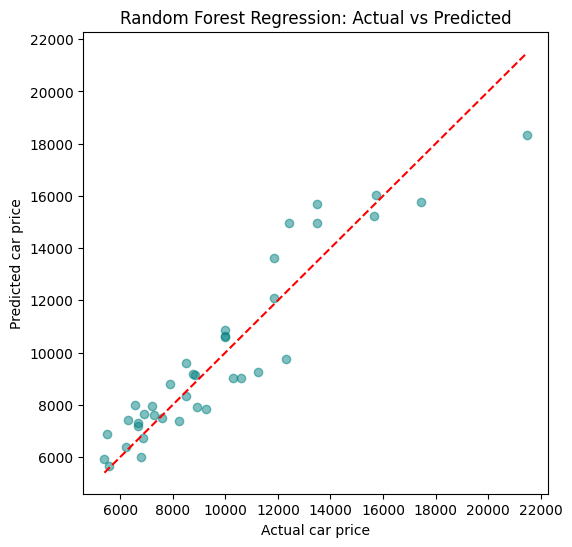

In [39]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual car price')
plt.ylabel('Predicted car price')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.show()

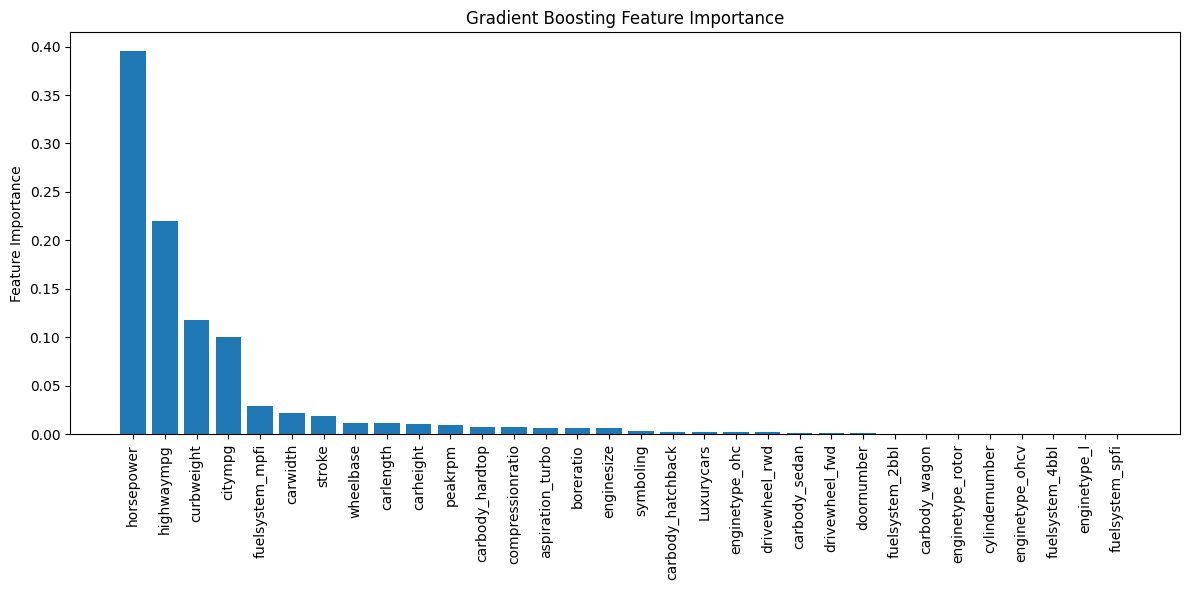

In [40]:
importances = rf_model.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.ylabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.tight_layout()
plt.show()

Mean Squared Error: 1975999.3148955589
Mean Absolute Error: 1057.1896589182898
R² Score: 0.8445338572928391


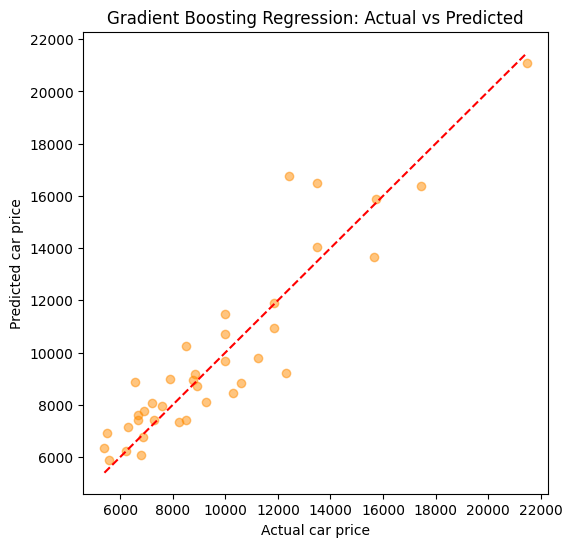

In [41]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(
    n_estimators=300,      # number of boosting stages
    learning_rate=0.05,    # smaller = slower but more accurate
    max_depth=5,           # depth of individual trees
    random_state=42
)

# Fit model
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual car price')
plt.ylabel('Predicted car price')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.show()

Mean Squared Error: 5743294.812480302
Mean Absolute Error: 1932.0985297141883
R² Score: 0.5481335017701903


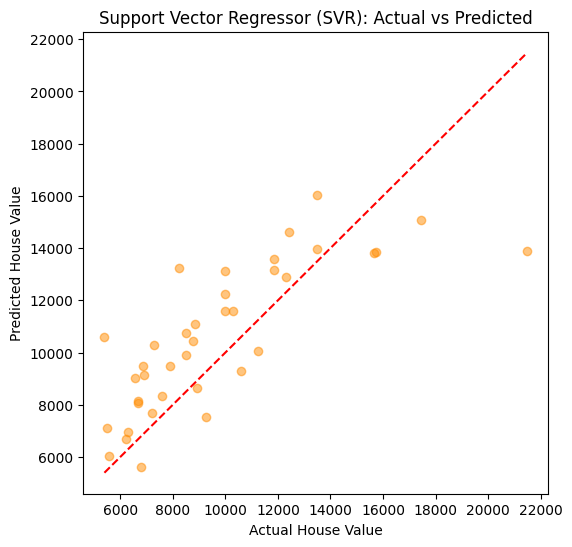

In [42]:
# Support Vector Regressor (SVR)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# y must also be scaled for SVR
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr_model.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Value')
plt.ylabel('Predicted House Value')
plt.title('Support Vector Regressor (SVR): Actual vs Predicted')
plt.show()

In [43]:
# Lets tune the GBR
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gb_params_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

gb_grid = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_params_grid,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

gb_grid.fit(X_train, y_train)

print("Best Params:", gb_grid.best_params_)
print("Best CV R²:", gb_grid.best_score_)

best_gb_model = gb_grid.best_estimator_

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best Params: {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_split': 6, 'n_estimators': 100, 'subsample': 0.8}
Best CV R²: 0.8305693225132342


In [44]:
path = "/content/drive/MyDrive/Entri - Data Science with Gen AI - Assignments/Intermediate assessment/best_model.pkl"
with open(path, "wb") as f:
    pickle.dump(best_gb_model, f)
print("Model saved to Google Drive!")

Model saved to Google Drive!


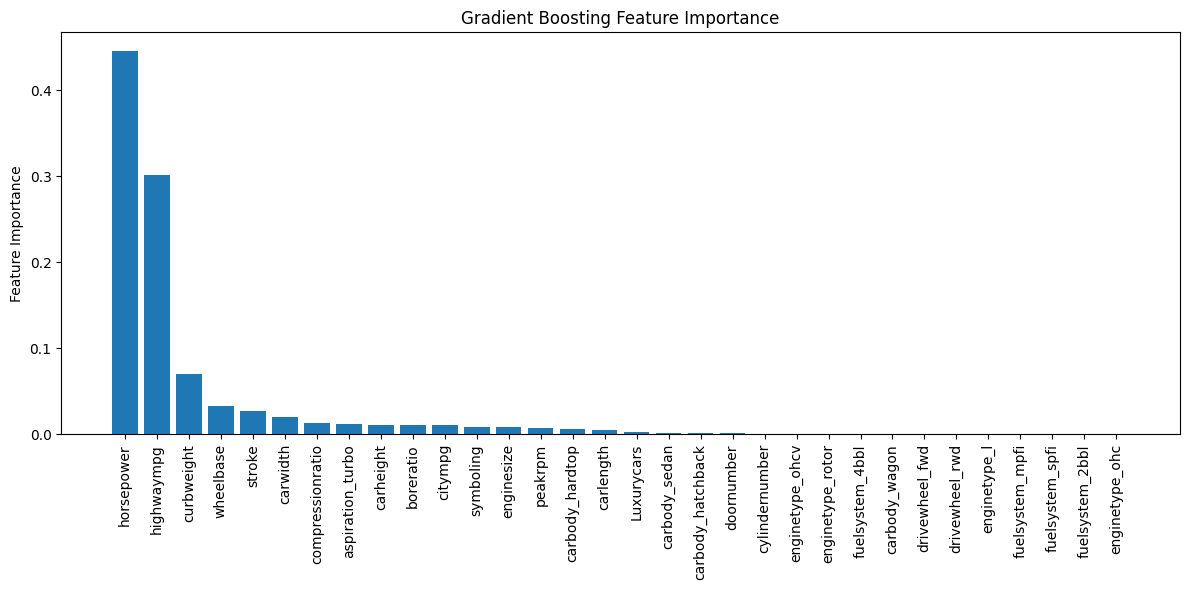

In [45]:
importances = best_gb_model.feature_importances_
features = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.ylabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.tight_layout()
plt.show()

Lets find how major features change the price.
- Engine size
- highway mileage
- curbweight
- horsepower
- Luxurycar or not
- carwidth
- Wheelbase

In [46]:
def quantify_change(model, X, feature_name, new_value):
    sample = X.iloc[[0]].copy()   # take any sample
    orig = model.predict(sample)[0]
    print(f'Change in the {feature_name}')
    print('Old ', feature_name,'=', sample[feature_name].sum())
    sample[feature_name] = new_value
    print('New ', feature_name,'=', sample[feature_name].sum())
    new = model.predict(sample)[0]
    print("Old Price:", orig)
    print("New Price:", new)
    print("Change:", new-orig,"\n")

quantify_change(best_gb_model, X, "enginesize", 200)


Change in the enginesize
Old  enginesize = 130
New  enginesize = 200
Old Price: 16496.5599588814
New Price: 17483.553933749037
Change: 986.993974867637 



Lets make graphs

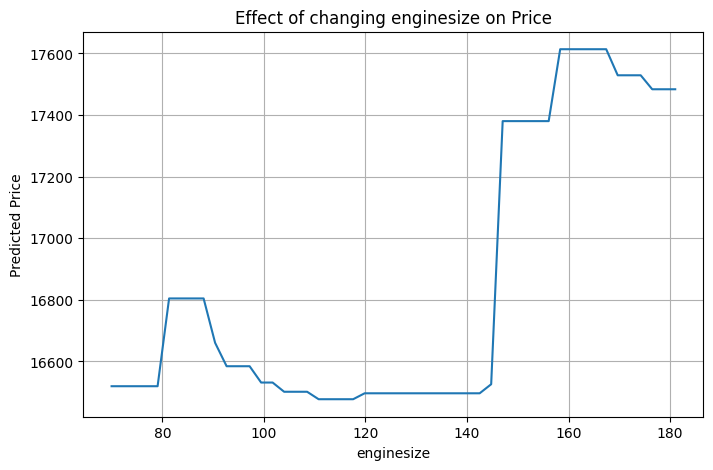

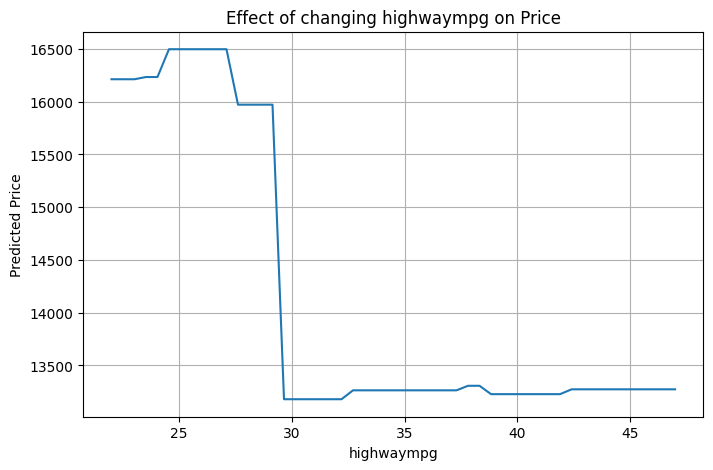

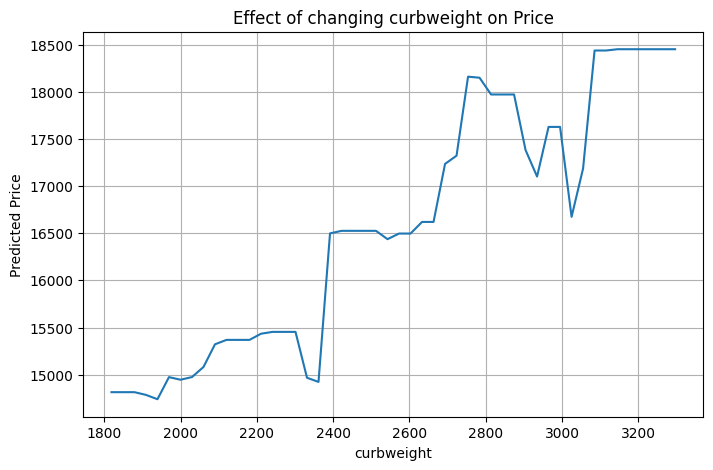

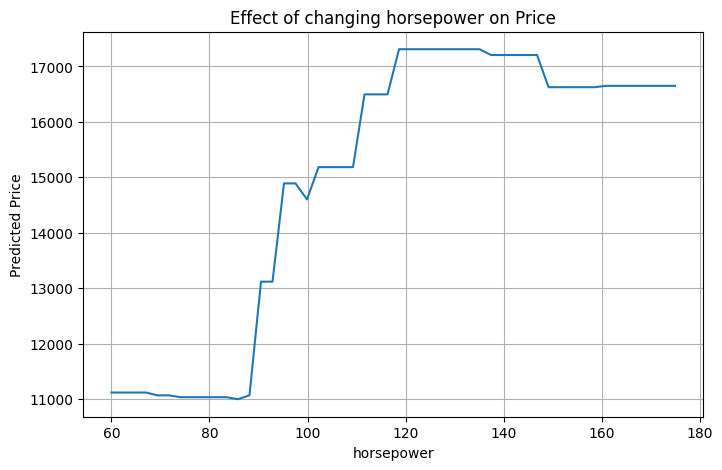

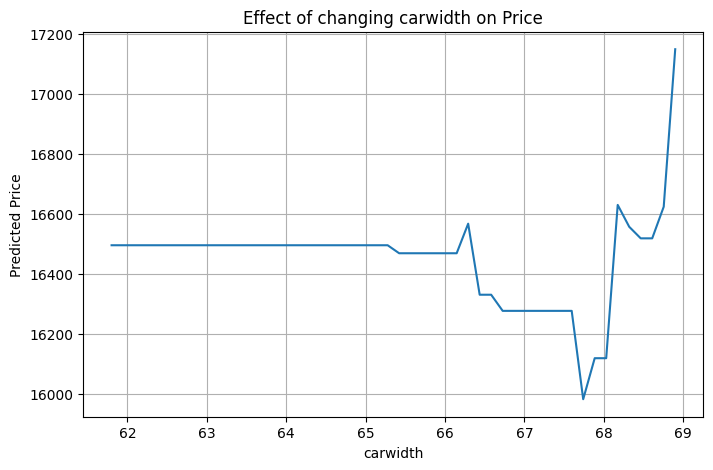

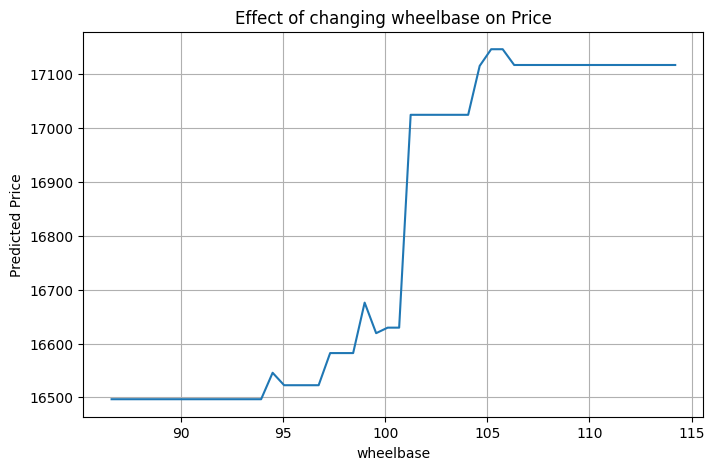

In [47]:
def plot_feature_effect(model, X, feature_name, points):
    X_sample = X.copy()
    min_val = X[feature_name].min()
    max_val = X[feature_name].max()
    values = np.linspace(min_val, max_val, points)
    # print(values)
    predictions = []

    for val in values:
        X_new = X_sample.iloc[0].copy()
        X_new[feature_name] = val
        pred = model.predict(pd.DataFrame([X_new], columns=X.columns))
        predictions.append(pred)

    # Plot
    plt.figure(figsize=(8,5))
    plt.plot(values, predictions)
    plt.xlabel(feature_name)
    plt.ylabel("Predicted Price")
    plt.title(f"Effect of changing {feature_name} on Price")
    plt.grid(True)
    plt.show()

plot_feature_effect(best_gb_model, X, "enginesize", 50)
plot_feature_effect(best_gb_model, X, "highwaympg", 50)
plot_feature_effect(best_gb_model, X, "curbweight", 50)
plot_feature_effect(best_gb_model, X, "horsepower", 50)
plot_feature_effect(best_gb_model, X, "carwidth", 50)
plot_feature_effect(best_gb_model, X, "wheelbase", 50)